# **Análise exploratória**

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
base = pd.read_csv('PS_20174392719_1491204439457_log.csv')
base.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [5]:
print("Formato do dataset:", base.shape)
base.info()

Formato do dataset: (14247, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14247 entries, 0 to 14246
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            14247 non-null  int64  
 1   type            14247 non-null  object 
 2   amount          14247 non-null  float64
 3   nameOrig        14247 non-null  object 
 4   oldbalanceOrg   14246 non-null  float64
 5   newbalanceOrig  14246 non-null  float64
 6   nameDest        14246 non-null  object 
 7   oldbalanceDest  14246 non-null  float64
 8   newbalanceDest  14246 non-null  float64
 9   isFraud         14246 non-null  float64
 10  isFlaggedFraud  14246 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 1.2+ MB


In [6]:
base.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,14247.000000,1.424700e+04,1.424600e+04,1.424600e+04,1.424600e+04,1.424600e+04,14246.000000,14246.0
mean,5.037131,1.118848e+05,7.937369e+05,8.107136e+05,8.411336e+05,1.147629e+06,0.005475,0.0
std,2.463112,2.805152e+05,2.016693e+06,2.059984e+06,2.528174e+06,3.151706e+06,0.073794,0.0
min,1.000000,2.390000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,2.000000,4.585130e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,6.000000,1.286936e+04,2.041500e+04,8.216325e+03,0.000000e+00,0.000000e+00,0.000000,0.0
75%,7.000000,1.218917e+05,1.384956e+05,1.294173e+05,2.641427e+05,2.775150e+05,0.000000,0.0
max,8.000000,1.000000e+07,1.293042e+07,1.301050e+07,2.093759e+07,2.533027e+07,1.000000,0.0


In [7]:
print("Tipos de transações:", base['type'].unique())

Tipos de transações: ['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']


In [8]:
#Verificarndo os valores nulos
print("Não há valores nulos no dataset")
base.isnull().sum()

Não há valores nulos no dataset


,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,1
newbalanceOrig,1
nameDest,1
oldbalanceDest,1
newbalanceDest,1
isFraud,1


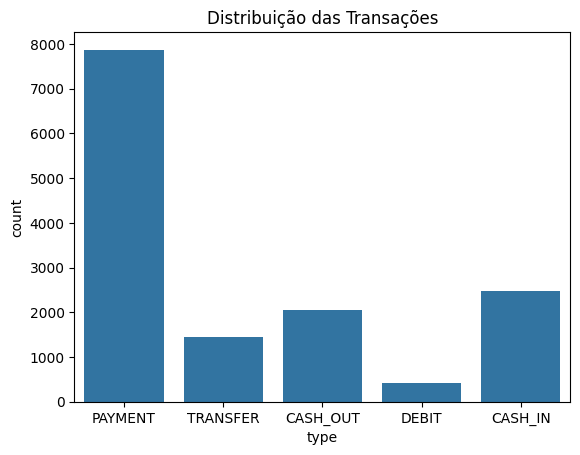

In [9]:
#Contando os diferentes tipos de transação
base['type'].value_counts()
sns.countplot(x='type', data=base)
plt.title("Distribuição das Transações")
plt.show()


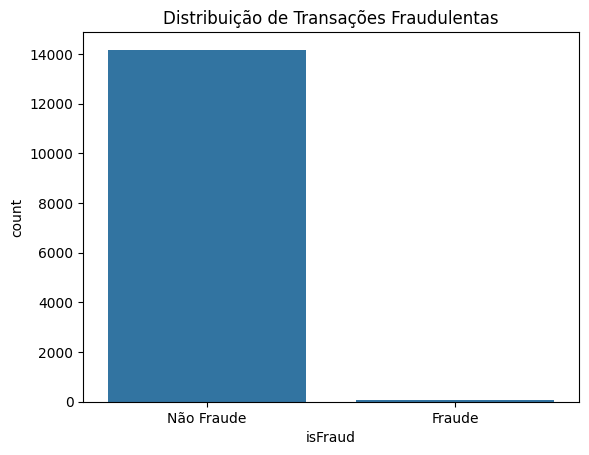

Porcentagem de fraudes:
isFraud
0.0    99.452478
1.0     0.547522
Name: proportion, dtype: float64


In [10]:
#Contagem de transações fraudulentas vs normais
sns.countplot(x='isFraud', data=base)
plt.title("Distribuição de Transações Fraudulentas")
plt.xticks([0, 1], ['Não Fraude', 'Fraude'])
plt.show()

#colocando isso em porcentagem
fraudes = base['isFraud'].value_counts(normalize=True) * 100
print("Porcentagem de fraudes:")
print(fraudes)


O valor de transações de fraude são extremamente pequenos perto do de não-fraude

In [11]:
#total de fraudes por tipo
fraudes_por_tipo = base.groupby('type')['isFraud'].sum().sort_values(ascending=False)

print(fraudes_por_tipo)


type
CASH_OUT    40.0
TRANSFER    38.0
CASH_IN      0.0
DEBIT        0.0
PAYMENT      0.0
Name: isFraud, dtype: float64


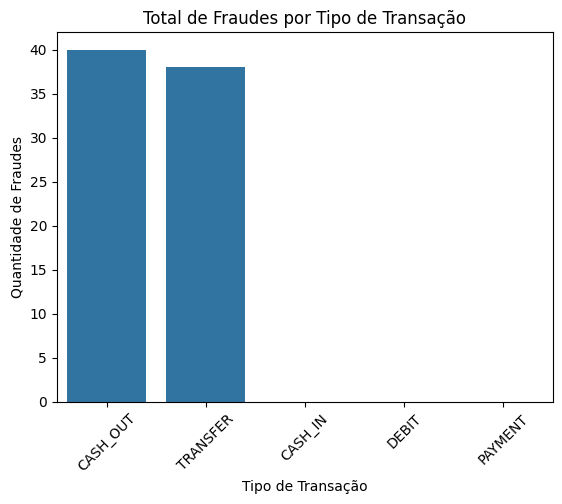

In [12]:
#visualizando com gráfico em barras
sns.barplot(x=fraudes_por_tipo.index, y=fraudes_por_tipo.values)
plt.title('Total de Fraudes por Tipo de Transação')
plt.ylabel('Quantidade de Fraudes')
plt.xlabel('Tipo de Transação')
plt.xticks(rotation=45)
plt.show()


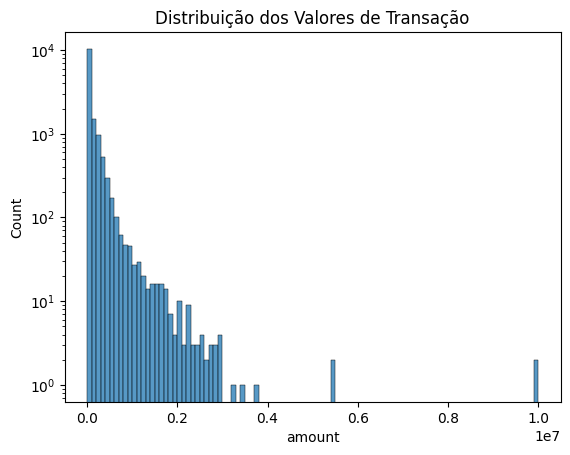

In [13]:
#Histograma dos valores de transação
sns.histplot(base['amount'], bins=100)
plt.yscale('log')  # Escala log para visualizar melhor
plt.title("Distribuição dos Valores de Transação")
plt.show()

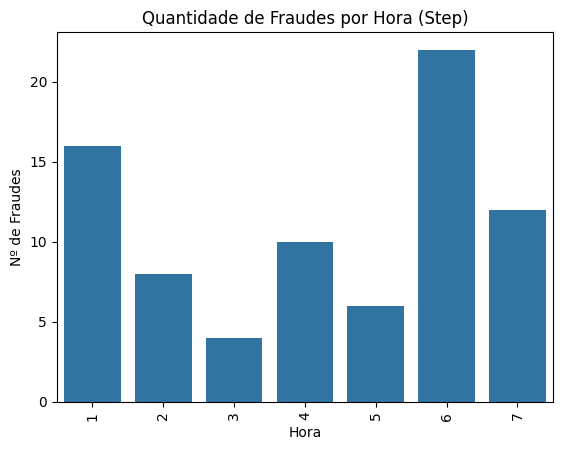

In [14]:
#analisando a coluna 'step' -quantas fraudes por hora
sns.countplot(x='step', data=base[base['isFraud'] == 1])
plt.title("Quantidade de Fraudes por Hora (Step)")
plt.xlabel("Hora")
plt.ylabel("Nº de Fraudes")
plt.xticks(rotation=90)
plt.show()


Observa-se que uma grande parte das fraudes ocorre as 6 da tarde

In [15]:
#Garantindo que só colunas numéricas entrem na correlação para o mapa de calor
base_corr = base.select_dtypes(include=['int64', 'float64'])

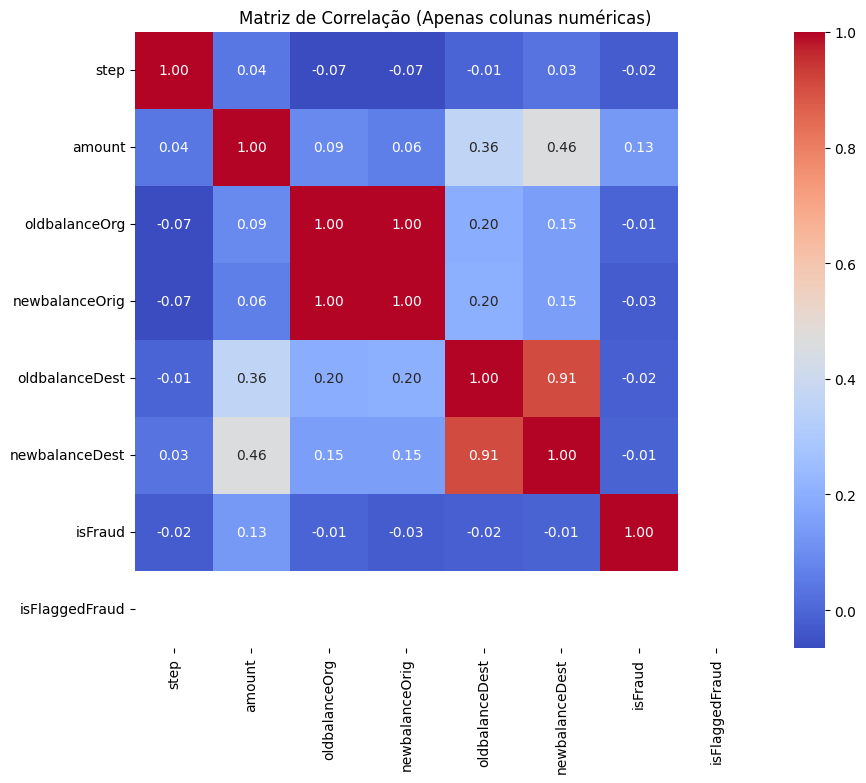

In [16]:
#Calculando correlação apenas com colunas numéricas para o mapa de calor
corr = base_corr.corr()

# Mapa de calor da matriz de correlação
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlação (Apenas colunas numéricas)")
plt.show()

O conjunto de dados apresenta uma grande desproporção entre transações legítimas e fraudulentas, com menos de 0.2% sendo fraudes. Isso indica que é um problema de classificação desbalanceada.

A maioria das fraudes ocorre em transações do tipo CASH_OUT e TRANSFER, o que sugere que essas operações são mais visadas por fraudadores.

Também percebe-se que há muitas transações com saldo de origem e destino igual a zero, o que pode ser indício de tentativas de ocultar ou disfarçar movimentações.

O heatmap mostra uma forte correlação de oldbalanceDest com newbalanceDest e de oldbalanceOrg com newbalanceOrig. Isso pode indicar redundancia.

 # **PRÉ PROCESSAMENTO DOS DADOS**


In [17]:
#Prosseguindo para o pré processamento dos dados, vamos transformar a coluna type em variaveis numericas
base = pd.get_dummies(base, columns=['type'], drop_first=True)

In [18]:
#removendo 2 colunas object que acredito que nao vao ter valor no treinamento do modelo
base = base.drop(['nameOrig', 'nameDest'], axis=1)

In [19]:
#separando as variaveis
X = base.drop('isFraud', axis=1)
y = base['isFraud']


In [20]:
from sklearn.model_selection import train_test_split

In [21]:
#verificando se há valores nulos na coluna y
y.isnull().sum()

np.int64(1)

In [22]:
#para x
print(X.isnull().sum())
print("Nao há valores nulos para x")

step              0
amount            0
oldbalanceOrg     1
newbalanceOrig    1
oldbalanceDest    1
newbalanceDest    1
isFlaggedFraud    1
type_CASH_OUT     0
type_DEBIT        0
type_PAYMENT      0
type_TRANSFER     0
dtype: int64
Nao há valores nulos para x


In [23]:
#removendo o valor nulo
base = base[base['isFraud'].notnull()]

In [24]:
X = base.drop('isFraud', axis=1)
y = base['isFraud']

In [25]:
#separando os dados (30% teste, 70% treino)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# **TREINAMENTO DO MODELO**


In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [27]:
knn = KNeighborsClassifier(n_neighbors=3)
arvore = DecisionTreeClassifier(random_state=42)
logreg = LogisticRegression(max_iter=1000)

In [28]:
#treinando os modelos
knn.fit(X_train, y_train)
arvore.fit(X_train, y_train)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [29]:
#fazendo as previsoes
pred_knn = knn.predict(X_test)
pred_arvore = arvore.predict(X_test)
pred_log = logreg.predict(X_test)

In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Função para avaliação
def avaliar_modelo(nome, y_true, y_pred):
    print(f"\n===== {nome} =====")
    print("Matriz de Confusão:")
    print(confusion_matrix(y_true, y_pred))
    print("\nRelatório de Classificação:")
    print(classification_report(y_true, y_pred))
    print("Acurácia:", accuracy_score(y_true, y_pred))

    #Avaliação dos modelos
avaliar_modelo("KNN", y_test, pred_knn)
avaliar_modelo("Árvore de Decisão", y_test, pred_arvore)
avaliar_modelo("Regressão Logística", y_test, pred_log)


===== KNN =====
Matriz de Confusão:
[[4239   12]
 [  14    9]]

Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4251
         1.0       0.43      0.39      0.41        23

    accuracy                           0.99      4274
   macro avg       0.71      0.69      0.70      4274
weighted avg       0.99      0.99      0.99      4274

Acurácia: 0.9939167056621432

===== Árvore de Decisão =====
Matriz de Confusão:
[[4246    5]
 [  10   13]]

Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4251
         1.0       0.72      0.57      0.63        23

    accuracy                           1.00      4274
   macro avg       0.86      0.78      0.82      4274
weighted avg       1.00      1.00      1.00      4274

Acurácia: 0.9964904071127749

===== Regressão Logística =====
Matriz de Confusão:
[[4251    0]
 [  19    4]]

Relatór

Plotando a matriz de confusão

In [31]:
def plotar_matriz_confusao(y_verdadeiro, y_predito, titulo):
    cm = confusion_matrix(y_verdadeiro, y_predito)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"Matriz de Confusão - {titulo}")
    plt.xlabel('Previsto')
    plt.ylabel('Real')
    plt.xticks([0.5, 1.5], ['Não Fraude (0)', 'Fraude (1)'])
    plt.yticks([0.5, 1.5], ['Não Fraude (0)', 'Fraude (1)'])
    plt.show()


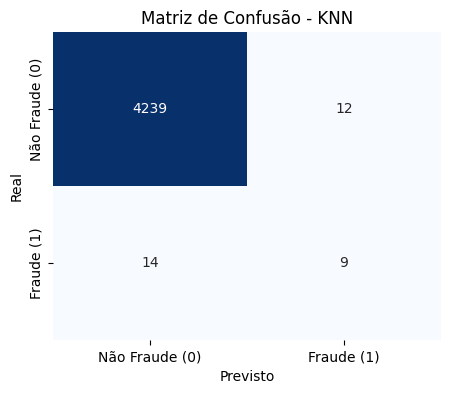

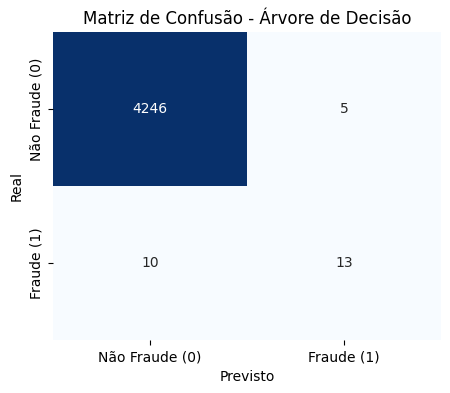

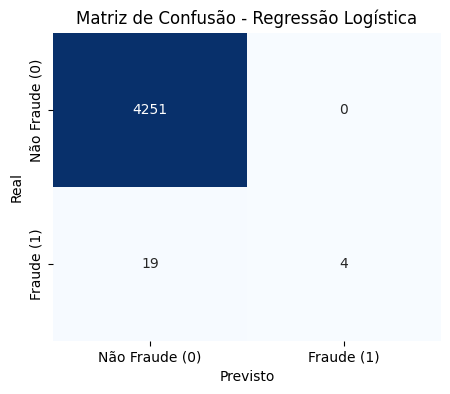

In [32]:
# KNN
plotar_matriz_confusao(y_test, pred_knn, "KNN")

# Árvore de Decisão
plotar_matriz_confusao(y_test, pred_arvore, "Árvore de Decisão")

# Regressão Logística
plotar_matriz_confusao(y_test, pred_log, "Regressão Logística")


A Árvore de Decisão apresentou o melhor equilíbrio entre precisão e recall para fraudes.
A Regressão Logística praticamente ignorou as fraudes.


Para descobrir os features mais importantes:

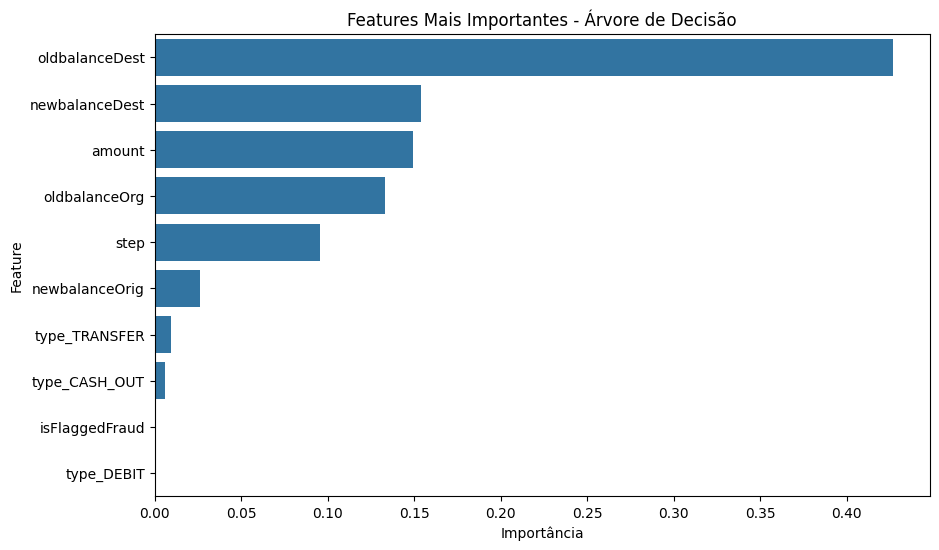

In [33]:
#Feature importance da árvore
importances = arvore.feature_importances_
nomes_colunas = X.columns

#criando o dataframe
importancia_df = pd.DataFrame({
    'Feature': nomes_colunas,
    'Importância': importances
}).sort_values(by='Importância', ascending=False)

#plotando num grafico de colunas
plt.figure(figsize=(10,6))
sns.barplot(x='Importância', y='Feature', data=importancia_df.head(10))
plt.title("Features Mais Importantes - Árvore de Decisão")
plt.show()


Utilizando o class_weight="balanced" pra tentar ajustar o modelo:


===== Árvore com class_weight='balanced' =====
Matriz de Confusão:
[[4247    4]
 [  17    6]]

Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4251
         1.0       0.60      0.26      0.36        23

    accuracy                           1.00      4274
   macro avg       0.80      0.63      0.68      4274
weighted avg       0.99      1.00      0.99      4274

Acurácia: 0.9950865699578849


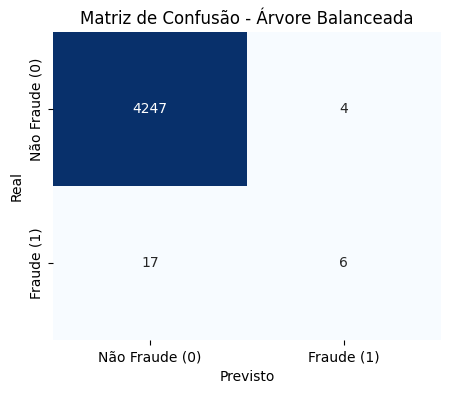

In [34]:
#Nova árvore balanceada
arvore_bal = DecisionTreeClassifier(random_state=42, class_weight='balanced')
arvore_bal.fit(X_train, y_train)

#Nova previsão
pred_arvore_bal = arvore_bal.predict(X_test)

#Avaliação
avaliar_modelo("Árvore com class_weight='balanced'", y_test, pred_arvore_bal)
plotar_matriz_confusao(y_test, pred_arvore_bal, "Árvore Balanceada")


**Conclusão:**

Após a análise exploratória, deu pra perceber que o conjunto de dados tem um desbalanceamento entre transações legítimas e fraudulentas. Por terem muitas transações não-fraudulentas, o modelo atingiu uma grande precisão e acuracia em detectá-las.

A Árvore de Decisão apresentou o melhor equilíbrio entre precisão e recall, especialmente após a aplicação do class_weight='balanced'.

Além disso, a análise das variáveis mais importantes revelou que o valor da transação e os saldos das contas antes/depois são os principais fatores para detectar possíveis fraudes.

